# Pada praktikum ini kita akan mempelajari algoritma HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) sebagai salah satu metode clustering berbasis densitas yang lebih robust dibandingkan DBSCAN.

## Persiapan Lingkungan

Jalankan kode berikut untuk menyiapkan library yang diperlukan.

In [ ]:
%pip install matplotlib
%pip install hdbscan

  Using cached matplotlib-3.10.6-cp310-cp310-win_amd64.whl (8.1 MB)
  Using cached pillow-11.3.0-cp310-cp310-win_amd64.whl (7.0 MB)
  Using cached contourpy-1.3.2-cp310-cp310-win_amd64.whl (221 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.3/2.3 MB 1.9 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.9-cp310-cp310-win_amd64.whl (73 kB)
     -------------------------------------- 113.9/113.9 kB 6.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Import modul
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import hdbscan

## Langkah 2: Definisi Fungsi Visualisasi
Jalankan fungsi ini agar kita bisa mem-plot hasil clustering dengan warna berbeda.

In [4]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

## Langkah 3: Membuat Dataset Sintetis
Dataset terdiri dari 3 buah cluster Gaussian.

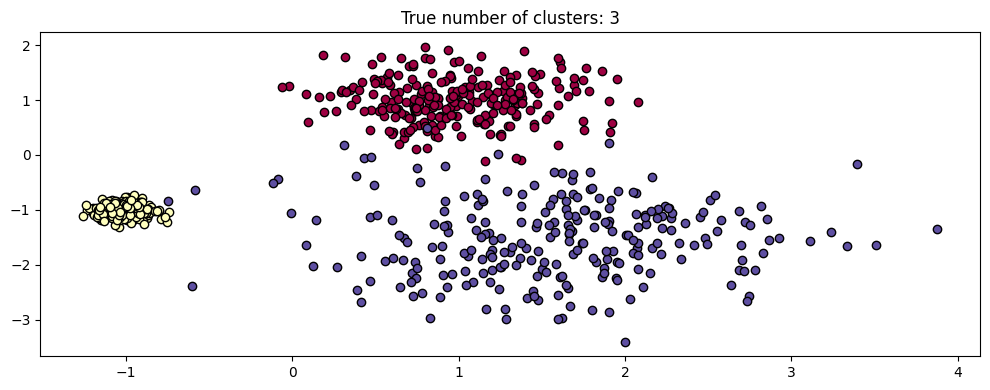

In [5]:
centers = [[1, 1], [-1, -1], [1.5, -1.5]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=[0.4, 0.1, 0.75], random_state=0
)

plot(X, labels=labels_true, ground_truth=True)